# 1

In [38]:
from Student import Student
import pandas as pd
import numpy as np
from Timer import Timer
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris

In [39]:
data = pd.read_csv("students.csv", delimiter=";")
data["Grades"] = data["Grades"].apply(lambda x: x.split(","))
data["Grades"] = data["Grades"].apply(lambda x: [int(i) for i in x])
data

,Name,Group,Grades
0,John Smith,Math-101,"[5, 4, 3]"
1,Anna Petrova,Physics-202,"[4, 5, 5]"
2,Alex Sidorov,CS-303,"[3, 3, 4]"
3,Emily Johnson,History-102,"[5, 5, 4]"
4,Michael Brown,Biology-201,"[4, 3, 5]"


In [40]:
students = []
for idx, row in data.iterrows():
    students.append(Student(name=row["Name"], group=row["Group"], grades=row["Grades"]))

In [41]:
with open("excellent_students.txt", "w") as f:
    for student in students:
        if student.is_excellent():
            f.write(f"{student.name}-{student.group}\n")

In [42]:
data["Mean_grade"] = data["Grades"].apply(lambda x: sum(x) / len(x))
dct = {}
for idx, row in data.iterrows():
    if row["Group"] not in dct:
        dct[row["Group"]] = []
        dct[row["Group"]].append(row["Mean_grade"])
    else:
        dct[row["Group"]].append(row["Mean_grade"])
for key in dct:
    dct[key] = sum(dct[key]) / len(dct[key])
dct

{'Math-101': 4.0,
 'Physics-202': 4.666666666666667,
 'CS-303': 3.3333333333333335,
 'History-102': 4.666666666666667,
 'Biology-201': 4.0}

# 2

In [43]:
import re

In [44]:
with open("logs.txt") as f:
    logs = f.readlines()
logs = " ".join(logs)

In [45]:
ips = re.findall(r"(\d+)\.(\d+)\.(\d+)\.(\d+)", logs)
ips

[('192', '168', '0', '1'),
 ('10', '0', '0', '5'),
 ('172', '16', '254', '3'),
 ('192', '168', '0', '101'),
 ('192', '168', '0', '102'),
 ('192', '168', '0', '102'),
 ('203', '0', '113', '7'),
 ('198', '51', '100', '23'),
 ('10', '0', '0', '7'),
 ('127', '0', '0', '1'),
 ('10', '10', '10', '10'),
 ('192', '0', '2', '55'),
 ('203', '0', '113', '9'),
 ('192', '168', '100', '200')]

In [46]:
years = re.findall(r"(\d{4})-(\d{2})-(\d{2})", logs)
years

[('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07'),
 ('2025', '09', '07')]

In [47]:
time = re.findall(r"(\d{2}):(\d{2}):(\d{2})", logs)
time

[('00', '12', '03'),
 ('00', '12', '05'),
 ('00', '12', '06'),
 ('00', '12', '10'),
 ('00', '15', '42'),
 ('00', '15', '45'),
 ('01', '03', '11'),
 ('01', '03', '13'),
 ('01', '03', '20'),
 ('02', '25', '00'),
 ('02', '25', '10'),
 ('03', '40', '55'),
 ('03', '41', '00'),
 ('04', '12', '12'),
 ('05', '00', '00'),
 ('06', '30', '30'),
 ('07', '45', '17'),
 ('08', '00', '00'),
 ('08', '00', '02'),
 ('09', '10', '10'),
 ('10', '20', '20'),
 ('11', '11', '11'),
 ('12', '34', '56'),
 ('13', '00', '00'),
 ('13', '05', '30'),
 ('13', '10', '00'),
 ('13', '15', '00'),
 ('14', '00', '00'),
 ('15', '30', '30'),
 ('16', '45', '00'),
 ('17', '20', '10'),
 ('18', '00', '00')]

In [48]:
uppercase = re.findall(r"\w+[A-Z]\s", logs)
[i.strip() for i in uppercase]
uppercase

['INFO ',
 'DEBUG ',
 'WARNING ',
 'LOGIN ',
 'ERROR ',
 'ACTION ',
 'REQUIRED\n',
 'INFO ',
 'INFO ',
 '12MB\n',
 'CRITICAL ',
 'DOWN ',
 'INFO ',
 'INFO ',
 'NOTICE ',
 'INFO ',
 'OPS_TEAM\n',
 'ERROR ',
 'SMTP ',
 'DEBUG ',
 'ALERT ',
 'INFO ',
 'REPORTER_SERVICE\n',
 'WARNING ',
 'DATA_INGEST\n',
 'INFO ',
 'INFO ',
 'CRON ',
 'INFO ',
 'CRON ',
 'ERROR ',
 'INFO ',
 'TLS ',
 'DEBUG ',
 'NOTICE ',
 'MAINTENANCE_TEAM ',
 'INFO ',
 'DOWNLOADING ',
 'INFO ',
 'INSTALLING ',
 'INFO ',
 'RESTARTING ',
 'INFO ',
 'VERIFICATION ',
 'OK\n',
 'WARNING ',
 'INFO ',
 'ERROR ',
 'DEBUG ',
 'INFO ']

In [49]:
logs_hide_email = re.sub(r"\w+.+?@\w+\.\w{2,}", "[EMAIL PROTECTED]", logs)
logs_hide_email

"2025-09-07 00:12:03 INFO  Server started on 192.168.0.1\n [EMAIL PROTECTED]\n [EMAIL PROTECTED] from 172.16.254.3\n 2025-09-07 00:12:10 ERROR  Disk quota exceeded for UID=1001 — ACTION REQUIRED\n 2025-09-07 00:15:42 INFO  Scheduled job executed: backup started\n 2025-09-07 00:15:45 INFO  Backup completed successfully. FILES=1245 SIZE=12MB\n 2025-09-07 01:03:11 CRITICAL Network interface eth0 went DOWN (192.168.0.101)\n 2025-09-07 01:03:13 INFO  Attempting failover to 192.168.0.102\n 2025-09-07 01:03:20 INFO  Failover complete — NEW_PRIMARY=192.168.0.102\n [EMAIL PROTECTED].co.uk\n 2025-09-07 02:25:10 INFO  Ticket created: #4532 ASSIGNED_TO=OPS_TEAM\n [EMAIL PROTECTED] ([EMAIL PROTECTED])\n 2025-09-07 03:41:00 DEBUG Retry attempt 1 for 203.0.113.7\n 2025-09-07 04:12:12 ALERT Unauthorized access attempt: source=198.51.100.23, target=10.0.0.7\n 2025-09-07 05:00:00 INFO  Daily report generated by REPORTER_SERVICE\n 2025-09-07 06:30:30 WARNING High memory usage detected: 90% — PROCESS=DATA

# 3

In [50]:
data = {
    "Товар": [
        "Телефон",
        "Телефон",
        "Телефон",
        "Ноутбук",
        "Ноутбук",
        "Ноутбук",
        "Планшет",
        "Планшет",
        "Планшет",
        "Наушники",
        "Наушники",
        "Наушники",
    ],
    "Цена": [
        50000,
        np.nan,
        52000,  # есть пропуск
        80000,
        82000,
        np.nan,  # есть пропуск
        30000,
        31000,
        32000,
        5000,
        np.nan,
        5500,  # есть пропуск
    ],
    "Количество": [
        10,
        0,
        15,  # 0 → выброс
        5,
        2000,
        7,  # 2000 → выброс
        20,
        25,
        1,
        1001,
        30,
        40,  # 1001 → выброс
    ],
}

df = pd.DataFrame(data, columns=data.keys())
df

,Товар,Цена,Количество
0,Телефон,50000.0,10
1,Телефон,NaN,0
2,Телефон,52000.0,15
3,Ноутбук,80000.0,5
4,Ноутбук,82000.0,2000
5,Ноутбук,NaN,7
6,Планшет,30000.0,20
7,Планшет,31000.0,25
8,Планшет,32000.0,1
9,Наушники,5000.0,1001


In [51]:
df["Цена"].fillna(df["Цена"].median(), inplace=True)
df = df.loc[(df["Количество"] > 1) & (df["Количество"] < 1000)]
df["total_price"] = df["Количество"] * df["Цена"]
df

/var/folders/g7/1pnn3np5387b0n86j69n94v40000gn/T/ipykernel_62514/213490383.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/g7/1pnn3np5387b0n86j69n94v40000gn/T/ipykernel_62514/213490383.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Товар,Цена,Количество,total_price
0,Телефон,50000.0,10,500000.0
2,Телефон,52000.0,15,780000.0
3,Ноутбук,80000.0,5,400000.0
5,Ноутбук,32000.0,7,224000.0
6,Планшет,30000.0,20,600000.0
7,Планшет,31000.0,25,775000.0
10,Наушники,32000.0,30,960000.0
11,Наушники,5500.0,40,220000.0


In [52]:
df.groupby("Товар").total_price.sum()

Товар
Наушники    1180000.0
Ноутбук      624000.0
Планшет     1375000.0
Телефон     1280000.0
Name: total_price, dtype: float64

<Axes: xlabel='Товар'>

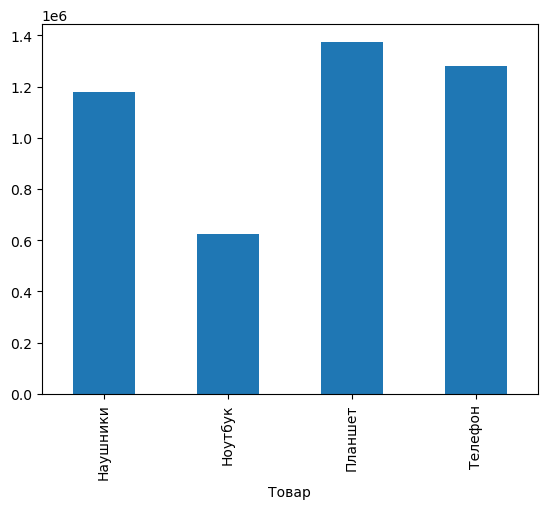

In [53]:
df.groupby("Товар").total_price.sum().plot(kind="bar")

# 4

In [54]:
A = np.matrix([np.random.randint(1, 10) for i in range(25)]).reshape(5, 5)
B = np.matrix([np.random.randint(1, 10) for i in range(25)]).reshape(5, 5)
A, B

(matrix([[3, 1, 3, 1, 9],
         [8, 4, 3, 3, 7],
         [1, 2, 6, 4, 5],
         [9, 6, 8, 9, 2],
         [8, 2, 5, 5, 5]]),
 matrix([[9, 8, 4, 6, 2],
         [3, 4, 8, 9, 5],
         [9, 1, 3, 2, 6],
         [1, 7, 5, 5, 9],
         [7, 1, 6, 8, 8]]))

In [55]:
res = np.zeros(shape=(5, 5))
for i in range(5):
    for j in range(5):
        res[i, j] = A[i, j] * B[i, j]
res

array([[27.,  8., 12.,  6., 18.],
       [24., 16., 24., 27., 35.],
       [ 9.,  2., 18.,  8., 30.],
       [ 9., 42., 40., 45., 18.],
       [56.,  2., 30., 40., 40.]])

In [56]:
A * B

matrix([[121,  47,  88, 110, 110],
        [163, 111, 130, 161, 137],
        [108,  55,  88,  96, 124],
        [194, 169, 165, 185, 193],
        [163, 117, 118, 141, 141]])

In [57]:
determinant = np.linalg.det(A)
determinant

np.float64(-202.00000000000077)

In [58]:
BT = np.transpose(B)
BT

matrix([[9, 3, 9, 1, 7],
        [8, 4, 1, 7, 1],
        [4, 8, 3, 5, 6],
        [6, 9, 2, 5, 8],
        [2, 5, 6, 9, 8]])

In [59]:
inverse_A = np.linalg.inv(A)
inverse_A

matrix([[-1.41584158,  0.96534653,  0.95049505, -0.93069307,  0.61881188],
        [-0.57425743,  0.61881188,  0.45544554, -0.23762376, -0.19306931],
        [-4.47524752,  2.96039604,  3.51485149, -2.92079208,  1.56435644],
        [ 5.43564356, -3.7970297 , -4.13861386,  3.59405941, -1.76732673],
        [ 1.53465347, -0.95544554, -1.07920792,  0.91089109, -0.50990099]])

In [60]:
c = A.sum(axis=1)
x = np.linalg.solve(A, c)
x

matrix([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

# 5

In [61]:
def safe_apply(func, data):
    results = []
    errors = []
    for i in data:
        try:
            results.append(func(i))
        except Exception as e:
            errors.append((i, e))

    return results, errors

In [62]:
safe_apply(lambda x: x**2, data=[4, 16, "text", -25, 9.0])

([16, 256, 625, 81.0],
 [('text',
   TypeError("unsupported operand type(s) for ** or pow(): 'str' and 'int'"))])

# 6

In [63]:
with Timer("task 4"):
    A = np.matrix([np.random.randint(1, 10) for i in range(25)]).reshape(5, 5)
    B = np.matrix([np.random.randint(1, 10) for i in range(25)]).reshape(5, 5)
    res = np.zeros(shape=(5, 5))
    for i in range(5):
        for j in range(5):
            res[i, j] = A[i, j] * B[i, j]
    A * B
    determinant = np.linalg.det(A)
    BT = np.transpose(B)
    inverse_A = np.linalg.inv(A)
    c = A.sum(axis=1)
    x = np.linalg.solve(A, c)

Time of task task 4: 0.00037304199940990657


# 7

In [64]:
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='viridis')])

# Настройки осей
fig.update_layout(
    width=1000,      # ширина окна
    height=700,      # высота окна
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

fig.show()

### Можно и 4D )

In [65]:
iris = load_iris()
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [66]:
fig = px.scatter_3d(
    iris_df,
    x=iris_df.columns[0],
    y=iris_df.columns[1],
    z=iris_df.columns[2],
    color=iris_df.columns[3],
    size_max=10,
    color_continuous_scale='viridis'
)

fig.update_layout(width=1000, height=700)

fig.show()